In [1]:
!pip install pyprind

In [2]:
import requests
import os            
import sys           
import tarfile      
import time         
import pyprind

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

In [3]:
def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = progress_size / (1024.**2 * duration)
    percent = count * block_size * 100. / total_size
    sys.stdout.write("\r%d%% | %d MB | %.2f MB/s | %d segundos transcurrido" %
                    (percent, progress_size / (1024.**2), speed, duration))
    sys.stdout.flush()

In [6]:
from zipfile import ZipFile 
with ZipFile("dataset.zip", mode='r') as zip:
  zip.extractall()
  print("termino extrancion de la data")

termino extrancion de la data


In [7]:
K.clear_session()
data_entrenamiento = '/content/dataset/entrenamiento'
data_validacion = '/content/dataset/validacion'

In [46]:
epocas=120                  
longitud, altura = 150, 150   
batch_size = 32              
pasos = 10                 
validation_steps = 300       
filtrosConv1 = 32            
filtrosConv2 = 64            
tamano_filtro1 = (3, 3)      
tamano_filtro2 = (2, 2)      
tamano_pool = (2, 2)         
clases = 3                   
lr = 0.0004                  

In [47]:
entrenamiento_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen= ImageDataGenerator(rescale=1. / 255)

In [10]:
if not os.path.isdir('/content/preview'):
  os.mkdir('/content/preview')

In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/dataset/entrenamiento/butterfly/butterfly (10).jpg')  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='butterfly', save_format='jpeg'):
    i += 1
    if i > 20:
        break 

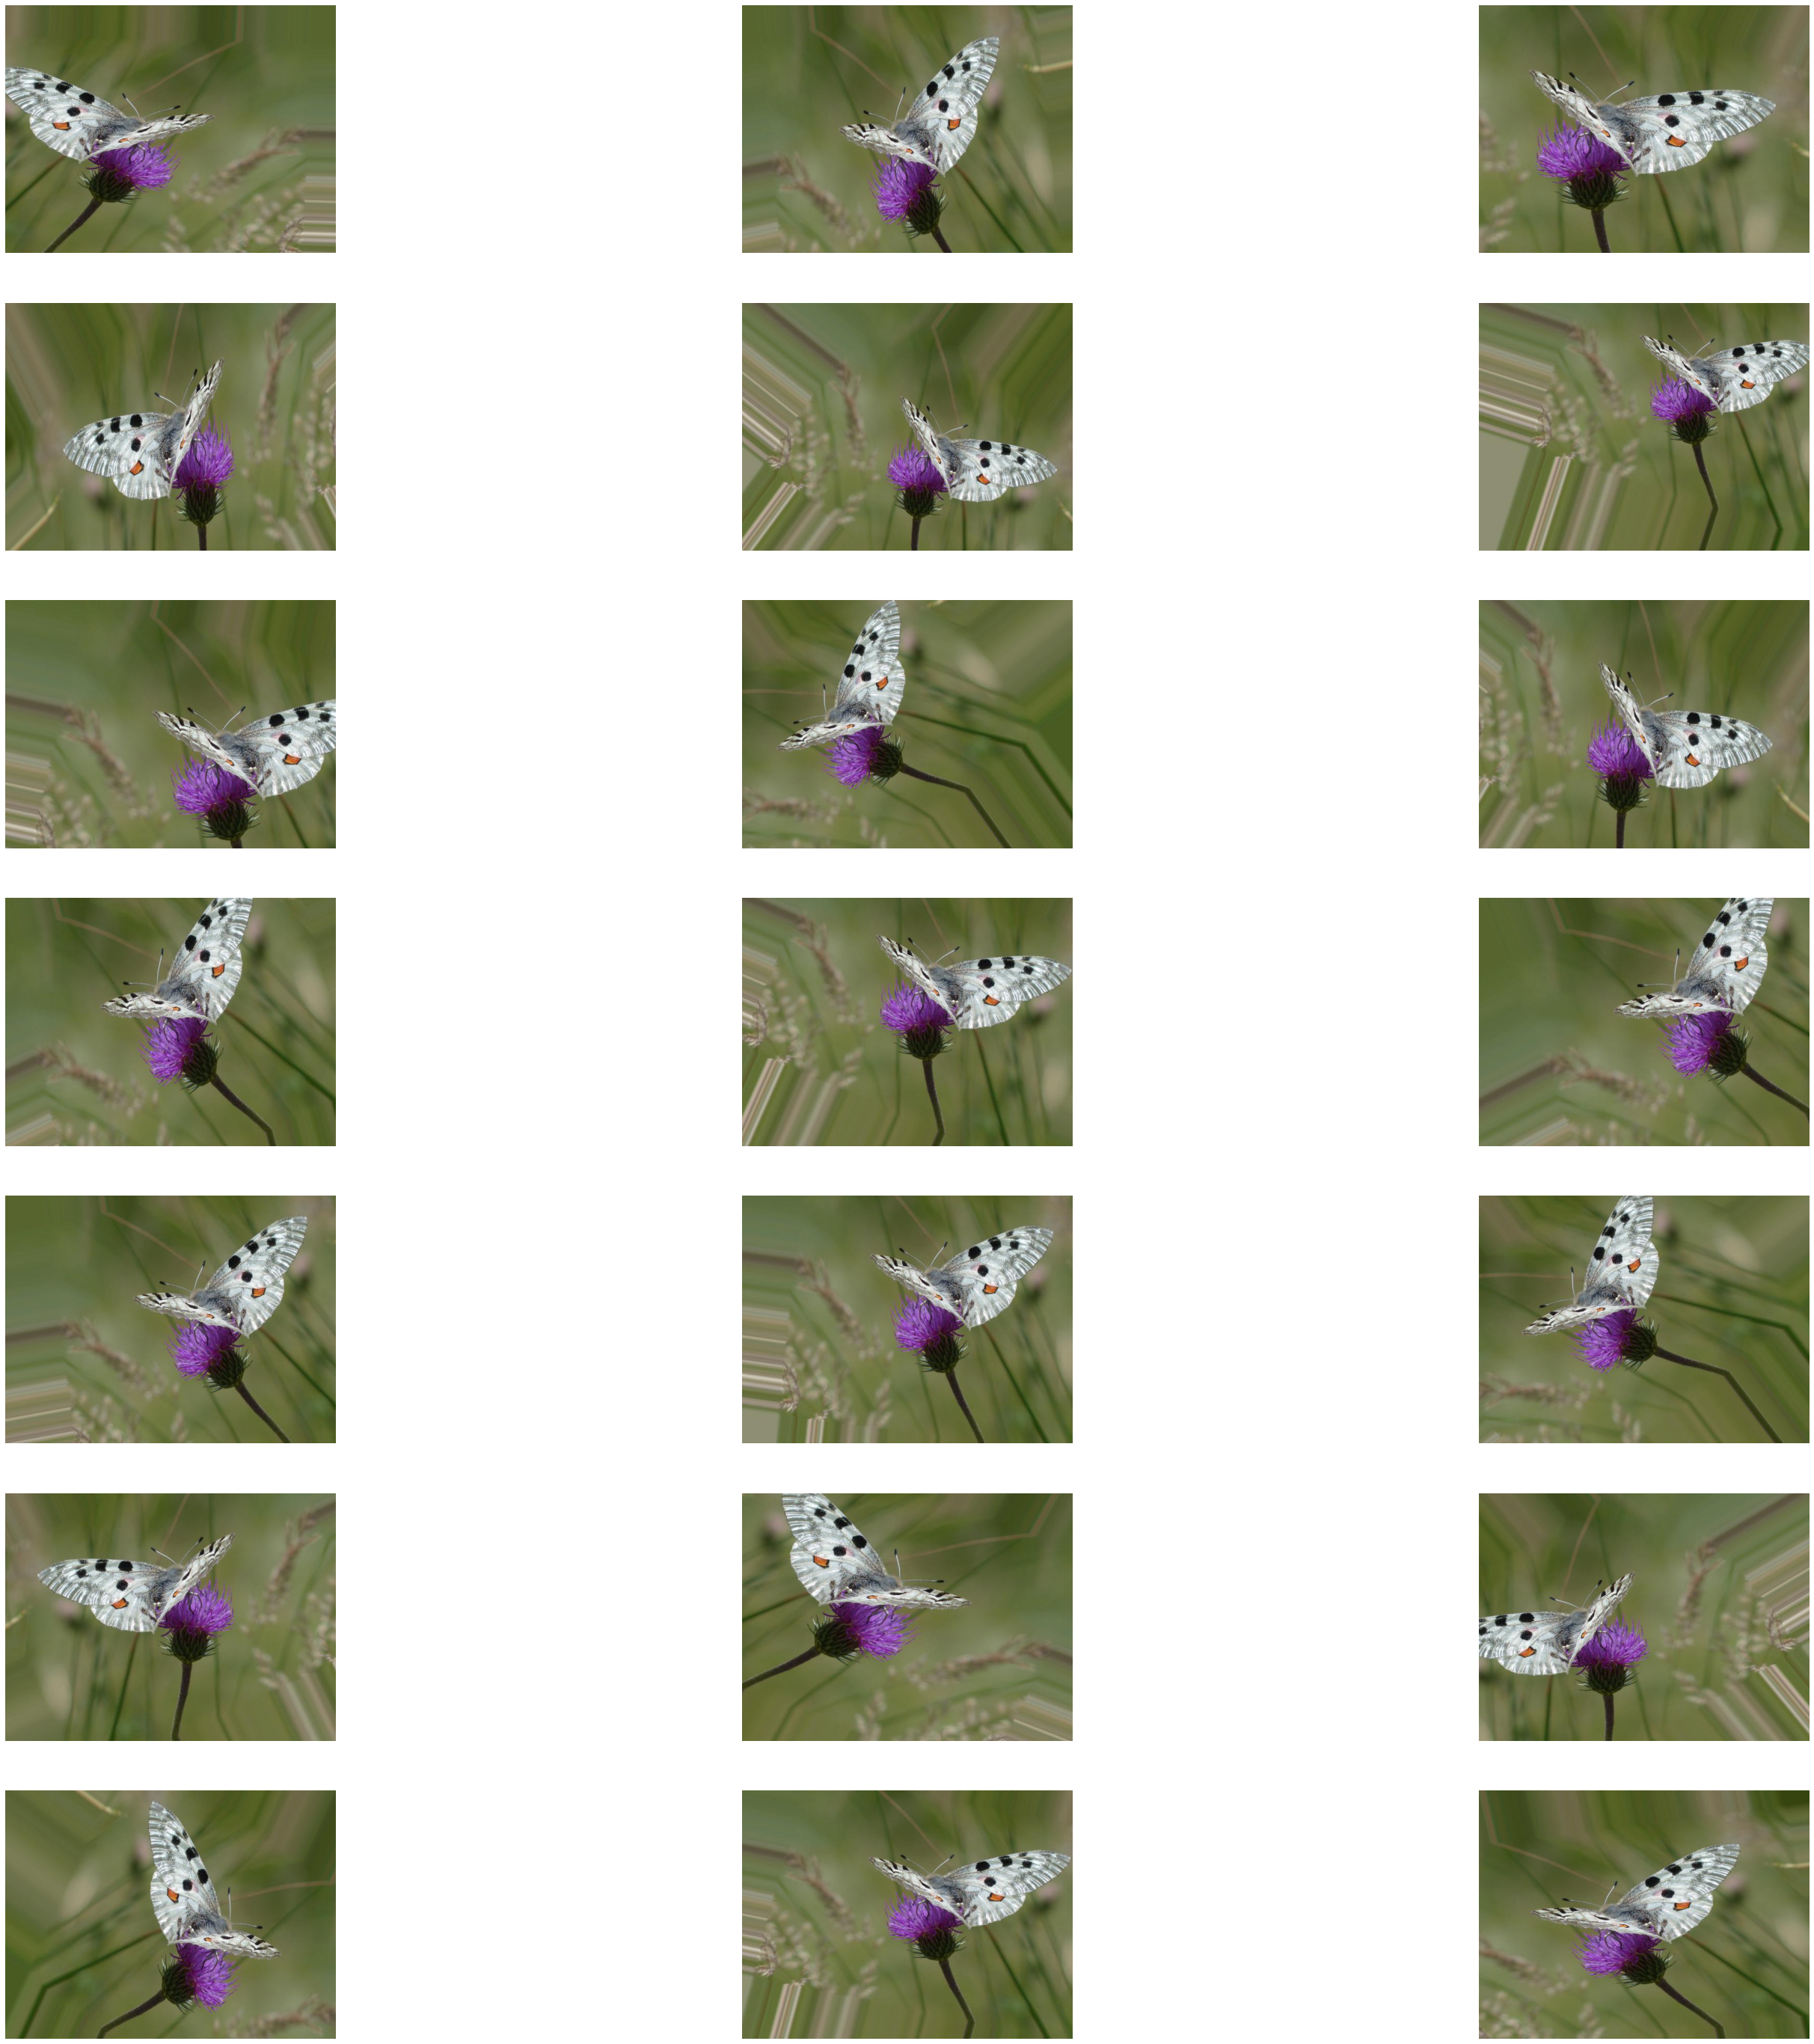

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

pathpreview='/content/preview'
files = os.listdir(pathpreview)
fnames = [os.path.join(pathpreview,fname)for fname in files[:]]
fig = plt.gcf()
fig.set_size_inches(50,50)
for i,fname in enumerate(fnames):
  sp = plt.subplot(7,3,i+1)
  sp.axis('off')
  img = mpimg.imread(fname)
  plt.imshow(img)

In [48]:
entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento, 
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

Found 303 images belonging to 3 classes.
Found 101 images belonging to 3 classes.


In [49]:
cnn = Sequential()


cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))


cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))


cnn.add(Flatten())                                   
cnn.add(Dense(256, activation='relu'))               
cnn.add(Dropout(0.5))                                
cnn.add(Dense(clases, activation='softmax'))         

cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [50]:
cnn.fit_generator(
    entrenamiento_generador,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=validacion_generador,
    validation_steps=validation_steps)

Epoch 1/120
10/10 [==============================] - 3s 267ms/step - loss: 6.0739 - accuracy: 0.3465 - val_loss: 7.1877 - val_accuracy: 0.2970
Epoch 2/120
10/10 [==============================] - 2s 217ms/step - loss: 6.8072 - accuracy: 0.3300
Epoch 3/120
10/10 [==============================] - 2s 220ms/step - loss: 6.5790 - accuracy: 0.3267
Epoch 4/120
10/10 [==============================] - 2s 218ms/step - loss: 6.3631 - accuracy: 0.3069
Epoch 5/120
10/10 [==============================] - 2s 217ms/step - loss: 5.1916 - accuracy: 0.3333
Epoch 6/120
10/10 [==============================] - 2s 218ms/step - loss: 1.8810 - accuracy: 0.4719
Epoch 7/120
10/10 [==============================] - 2s 217ms/step - loss: 0.7689 - accuracy: 0.5809
Epoch 8/120
10/10 [==============================] - 2s 218ms/step - loss: 0.9298 - accuracy: 0.5281
Epoch 9/120
10/10 [==============================] - 2s 217ms/step - loss: 0.8080 - accuracy: 0.5380
Epoch 10/120
10/10 [=============================

In [51]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modeloGPG.h5')
cnn.save_weights('./modelo/pesosGPG.h5')

In [52]:
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.models import load_model
import h5py

In [53]:
longitud, altura = 150, 150
modelo = './modelo/modeloGPG.h5'
pesos_modelo = './modelo/pesosGPG.h5'
cnn = load_model(modelo)           
cnn.load_weights(pesos_modelo)     

In [54]:
def predict(file):
  x = load_img(file, target_size=(longitud, altura))   
  x = img_to_array(x)                                  
  x = np.expand_dims(x, axis=0)                        
  array = cnn.predict(x)                               
  result = array[0]                                    
  answer = np.argmax(result)                           
  class_names = ['butterfly', 'chiken', 'sheep']
  print(class_names[answer])
  return answer

In [56]:
predict("/content/chiken1.jpg")

chiken


1